# Introduction

The aim of this notebook is to use visualization tools, specifically Matplotlib and Seaborne, to explore and analyze data related to immigration to Canada. Data visualization involves the use of visual aids, like plots, to represent complex data sets and make them more accessible and easier to understand. The goal of data visualization is to communicate complex data in a clear, concise, and visually appealing manner, allowing viewers to quickly and easily identify patterns, trends, and relationships that might not be apparent in raw data.

### Points of Interest
1. [Compare the trend of top 5 countries that contributed the most to immigration to Canada.](#Trend-of-Top-5-Countries)
2. [Compare the relative contribution of top 5 countries to immigration to Canada.](#Relative-Contribution-of-Top-5-Countries)
3. [Compare the total contribution of top 5 countries to immigration to Canada.](#Total-Immigration-of-Top-5-Countries)

# Data

The original dataset includes yearly information on the movement of people across borders, as reported by the receiving countries. The data covers both incoming and outgoing migration and includes details on birthplace, nationality, and previous/next place of residence for both foreign-born and native-born individuals. The dataset currently provides data on 45 different countries. Unfortunately, the original source is no longer available.

The dataset `canadian_immegration_data` available in kaggle is a subset of the original and it consisted on 195 rowns and 39 columns. Each row represents a country with annual flows of international immigrants to Canada from 1980 to 2013.


In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
# Read the CSV file containing immigration data for Canada into a Pandas DataFrame
canada_df = pd.read_csv("/kaggle/input/immigration-to-canada/canadian_immegration_data.csv")

# Display the first five rows of the DataFrame to check its content
canada_df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


First I am going to check the presence of `null` values in the dataframe. For this, I´ll create a function with `isnull()` method along with the `sum()` method. It is important to check for the presence of null values or NAs in a dataset because they can have a significant impact on data analysis and modeling.

1. **Null values can cause errors**: If a null value is present in a dataset and not handled properly, it can cause errors in statistical analysis or modeling.
2. **Null values can affect the quality of the analysis**: If a significant portion of the data is missing, it can affect the quality of the analysis or modeling results.
3. **Null values can affect the data distribution**: If null values are not handled properly, they can affect the distribution of the data. 
4. **Null values can affect data visualization**: If null values are present in a dataset, they can affect the accuracy of data visualizations. 

In [3]:
def check_nulls(df):
    
    """
    Check if any columns in a Pandas DataFrame contain null values.  
    
    Parameters:
        df (DataFrame): The Pandas DataFrame to check for null values.
    
    Returns:
        str: A message indicating the presence or absence of null values.
    """
    
    # Check null values in the dataFrame
    null_count = df.isnull().sum()
    
    # Get the column name(s) with null values
    null_cols = null_count[null_count > 0].index.tolist()
    
    if len(null_cols) > 0:
        
        # If null values are present, return the name of the column(s) and number of null values
        msg = "The following column(s) have null values: "
        
        for colummn in null_cols:
            msg += f"{colummn}, {null_count[colummn]}; "
        return msg.rstrip(", ")
    
    else:
        print("There are no null values in the dataFrame")

In [4]:
# Check for null values in canada_df
check_nulls(canada_df)

There are no null values in the dataFrame


Now I am going to create a list of the years present in the dataset. I can use that list as a filter later in the code. Secondly, since each row is actually a country, I am goint to use the `Country` column as an Index forthe dataset; this can provide several benefits for data analysis and manipulation:
- First, Using a column as an index can simplify data selection, as data can be retrieved based on the values in the index using the `.loc[]` method. This can be especially useful for selecting subsets of data based on specific criteria or for performing calculations on subsets of data.
- Second, Using a column as an index can improve the readability of the data, as the index values can provide additional context and help to organize the data in a logical way. This can be especially useful when working with time series or categorical data.

In [5]:
# Create a list of string representations of the range of years from 1980 to 2013
years = list(map(str, range(1980, 2014)))

# Set the index of the 'canada_df' dataframe to the 'Country' column
canada_df.set_index('Country', inplace = True)

In [6]:
# Sort the 'canada_df' dataframe by the 'Total' column in descending order
canada_df.sort_values(by = "Total", ascending = False, inplace = True)

# Get the top 5 rows of the sorted dataframe and assign it to 'top5_df'
top5_df = canada_df.head(5)

# Transpose 'top5_df' to create a new dataframe with the years as columns and countries as rows
top5_df = top5_df[years].transpose()

# Rename the 'UK' column 
top5_df = top5_df.rename(columns = {'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'})

### Trend of Top 5 Countries

In order to answer visualize the trend I am going to use a line chart. A line chart displays data as a series of points connected by straight lines. It is a simple and effective way to visualize trends and patterns in data over time, and it is especially useful when you want to compare the trends of multiple data series on the same plot. Line chart are also useful when the focus is on the exact values of the data points.

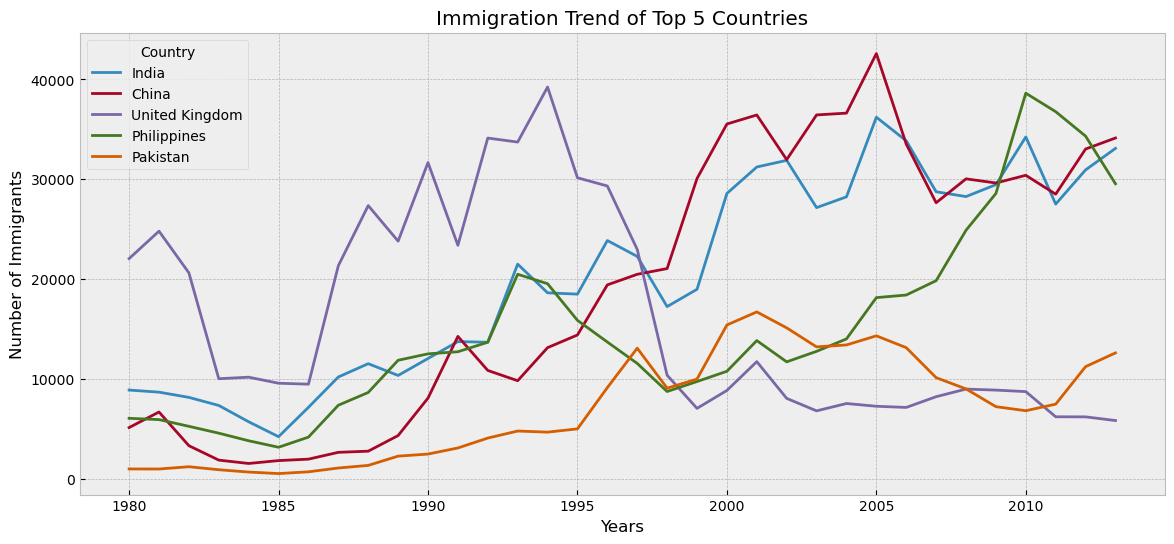

In [7]:
# Set the style
style.use('bmh')

# Plot a line graph of the 'top5_df' DataFrame
top5_df.plot(kind = 'line', figsize = (14, 6))

# Add a labels to the plot
plt.title('Immigration Trend of Top 5 Countries') # Add a title to the plot
plt.ylabel('Number of Immigrants') # Add a label to the y-axis
plt.xlabel('Years') # Add a label to the x-axis
plt.show() # Show the plot

### Relative Contribution of Top 5 Countries
In order to visualize this I am going to use an area chart. An area chart, unilke a line chart, displays the data as a filled-in area between the data and the x-axis. It is similar to a line chart, but the area between the line and the x-axis is filled with color or shading. Area chart are useful when you want to compare the relative importance or contribution of each data series to the total. They are also useful when the focus is on the magnitude of the data, rather than the exact values.

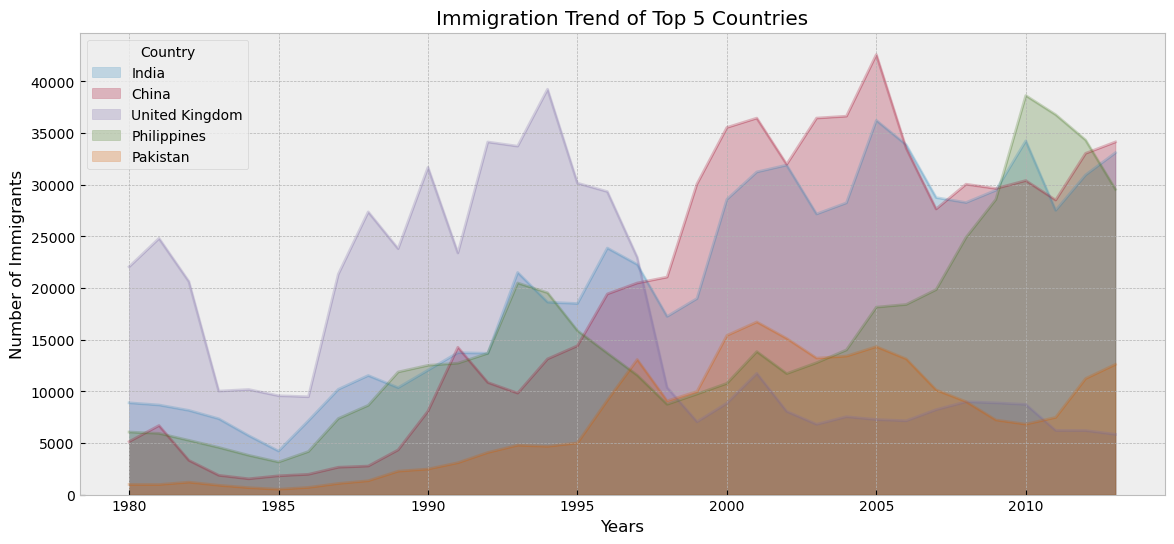

In [8]:
# Plot an area graph of the 'top5_df' DataFrame
top5_df.plot(kind = 'area', stacked = False, alpha = 0.25, figsize = (14, 6))

# Add a labels to the plot
plt.title('Immigration Trend of Top 5 Countries') # Add a title to the plot
plt.ylabel('Number of Immigrants') # Add a label to the y-axis
plt.xlabel('Years') # Add a label to the x-axis
plt.show() # Show the plot

In [9]:
countries = ['India', 'China', 'United Kingdom']
top3_df = top5_df[countries].copy()
top3_df.reset_index(inplace = True)
top3_df.rename(columns = {'index':'Year'}, inplace = True)
top3_df.columns.name = None
top3_df = top3_df.melt(id_vars = 'Year', value_vars = ['India', 'China', 'United Kingdom'], var_name = 'Country', value_name = 'Total')

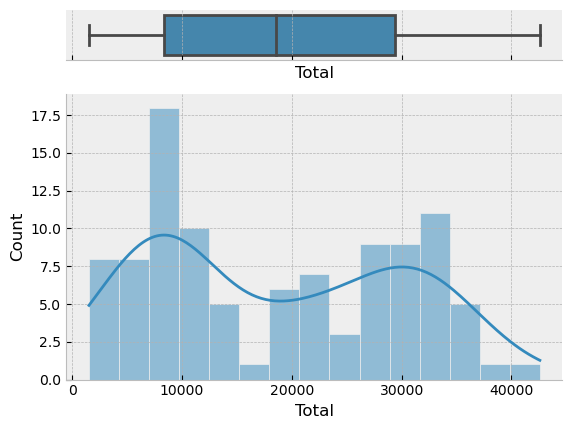

In [10]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x = top3_df["Total"], ax = ax_box)
sns.histplot(x = top3_df["Total"], bins = 15, kde = True, ax = ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

### Total Immigration of Top 5 Countries

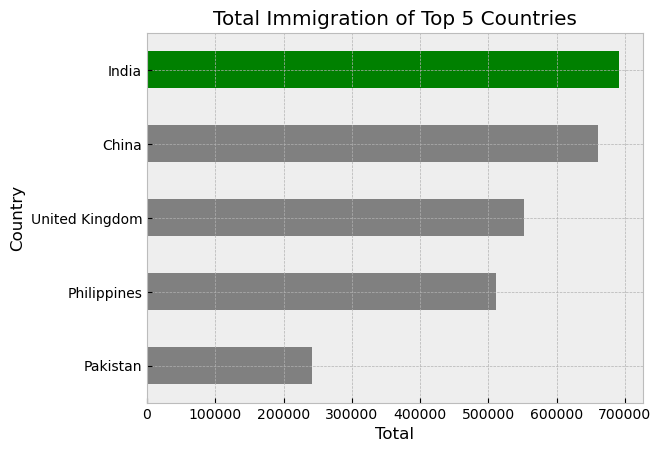

In [11]:
# Get the top 5 rows of the canada_df dataframe, extract the Total column, and reset the index
top5_df = canada_df.head(5)
top5_df = top5_df[["Total"]]
top5_df.reset_index(inplace = True)

# Change the name of the country at index 2 to "United Kingdom"
top5_df.loc[2, "Country"] = 'United Kingdom'

# Sort the top5_df dataframe by Total in ascending order
top5_df.sort_values(by = "Total", ascending = True, inplace = True)

# Create a horizontal bar plot
ax = top5_df.plot(kind = "barh", x = "Country", y = "Total", color = ['gray'] * 4 + ['green'])

# Remove the legend
ax.legend([''], frameon=False, handlelength=0, handleheight=0)

# Add a labels to the plot
plt.title('Total Immigration of Top 5 Countries') # Add a title to the plot
plt.xlabel('Total') # Add a label to the x-axis
plt.show() # Show the plot